In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime as dt

### Read a Google company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [ ]:
google_stock = pd.read_csv('gogl.us.txt')
google_stock

In [ ]:
google_stock.describe()

### Read a Apple company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [ ]:
apple_stock = pd.read_csv('aapl.us.txt')
apple_stock

In [ ]:
apple_stock.describe()

### Read a Amazon company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [ ]:
amazon_stock = pd.read_csv('amzn.us.txt')
amazon_stock

In [ ]:
amazon_stock.describe()

### Read a Tesla company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [ ]:
tesla_stock = pd.read_csv('tsla.us.txt')
tesla_stock

In [ ]:
tesla_stock.describe()

### Read a Walmart company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [ ]:
walmart_stock = pd.read_csv('wmt.us.txt')
walmart_stock

In [ ]:
walmart_stock.describe()

### *Convert the all data in date column to datetime object by using datetime library.*

In [ ]:
google_stock['Date'] = pd.to_datetime(google_stock['Date'])
google_stock.dtypes

In [ ]:
apple_stock['Date'] = pd.to_datetime(apple_stock['Date'])
apple_stock.dtypes

In [ ]:
amazon_stock['Date'] = pd.to_datetime(amazon_stock['Date'])
amazon_stock.dtypes

In [ ]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
tesla_stock.dtypes

In [ ]:
walmart_stock['Date'] = pd.to_datetime(walmart_stock['Date'])
walmart_stock.dtypes

### *Checking the data frame to find any null values*

In [ ]:
google_stock.isnull().sum()

In [ ]:
apple_stock.isnull().sum()

In [ ]:
amazon_stock.isnull().sum()

In [ ]:
tesla_stock.isnull().sum()

In [ ]:
walmart_stock.isnull().sum()

### Showing the Correlation between all Stock Datas

In [ ]:
tesla_stock['Year'] = tesla_stock['Date'].dt.year
tesla_stock['MonthYear'] = tesla_stock['Date'].dt.to_period('M')
tesla_stock

data = tesla_stock.groupby(['MonthYear']).mean()
data

In [ ]:
data.plot(y='Close', kind='line', figsize=(15,5), title='Average Price per Month for Tesla Stock')
plt.xticks(data.index, rotation=45)
plt.grid()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(tesla_stock['Date'], tesla_stock['Close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Close of Tesla Stock')
ax1.grid()
ax2.bar(tesla_stock['Date'], tesla_stock['Volume'], color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.set_title('Volume of Tesla Stock')
ax2.grid()
plt.show()

### Tesla Stock Price - Volume Graph

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=tesla_stock['Date'],
                open=tesla_stock['Open'],
                high=tesla_stock['High'],
                low=tesla_stock['Low'],
                close=tesla_stock['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [ ]:
from plotly import graph_objs as go
fig = go.Figure(data=[go.Candlestick(x=tesla_stock.index,open=tesla_stock['Open'],high=tesla_stock['High'],low=tesla_stock['Low'],close=tesla_stock['Close'])])

fig.show()

### Korrelation zwischen Aktien


In [ ]:
# Show on an heatmap the correlation between the apple, google, amazon, tesla and walmart stocks
stocks = pd.concat([apple_stock['Close'], google_stock['Close'], amazon_stock['Close'], tesla_stock['Close'], walmart_stock['Close']], axis=1)
stocks.columns = ['Apple', 'Google', 'Amazon', 'Tesla', 'Walmart']
stocks

plt.figure(figsize=(10,5))
sns.heatmap(stocks.corr(), annot=True, cmap='coolwarm')



In [ ]:
# Show the correlation between the stocks
sns.pairplot(stocks, palette='coolwarm',plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))


### Close Prices of all Stocks

In [ ]:
#Show the Close Prices of the stocks on a one single plot, but in according to months
stocks = pd.concat([apple_stock['Close'], google_stock['Close'], amazon_stock['Close'], tesla_stock['Close'], walmart_stock['Close']], axis=1)
stocks.columns = ['Apple', 'Google', 'Amazon', 'Tesla', 'Walmart']
stocks

stocks['MonthYear'] = apple_stock['Date'].dt.to_period('M')

stocks = stocks.groupby(['MonthYear']).mean()

stocks.plot(figsize=(15,5), title='Average Price per Month for Apple, Google, Amazon, Tesla and Walmart Stock')
plt.xticks(stocks.index, rotation=45)
plt.grid()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\plotting.py:648: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Start date,2017-12-27
End date,2022-12-22
Total months,59
,Backtest
Annual return,16.3%
Cumulative returns,112.6%
Annual volatility,25.1%
Sharpe ratio,0.73
Calmar ratio,0.58
Stability,0.85
Max drawdown,-28.3%


c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



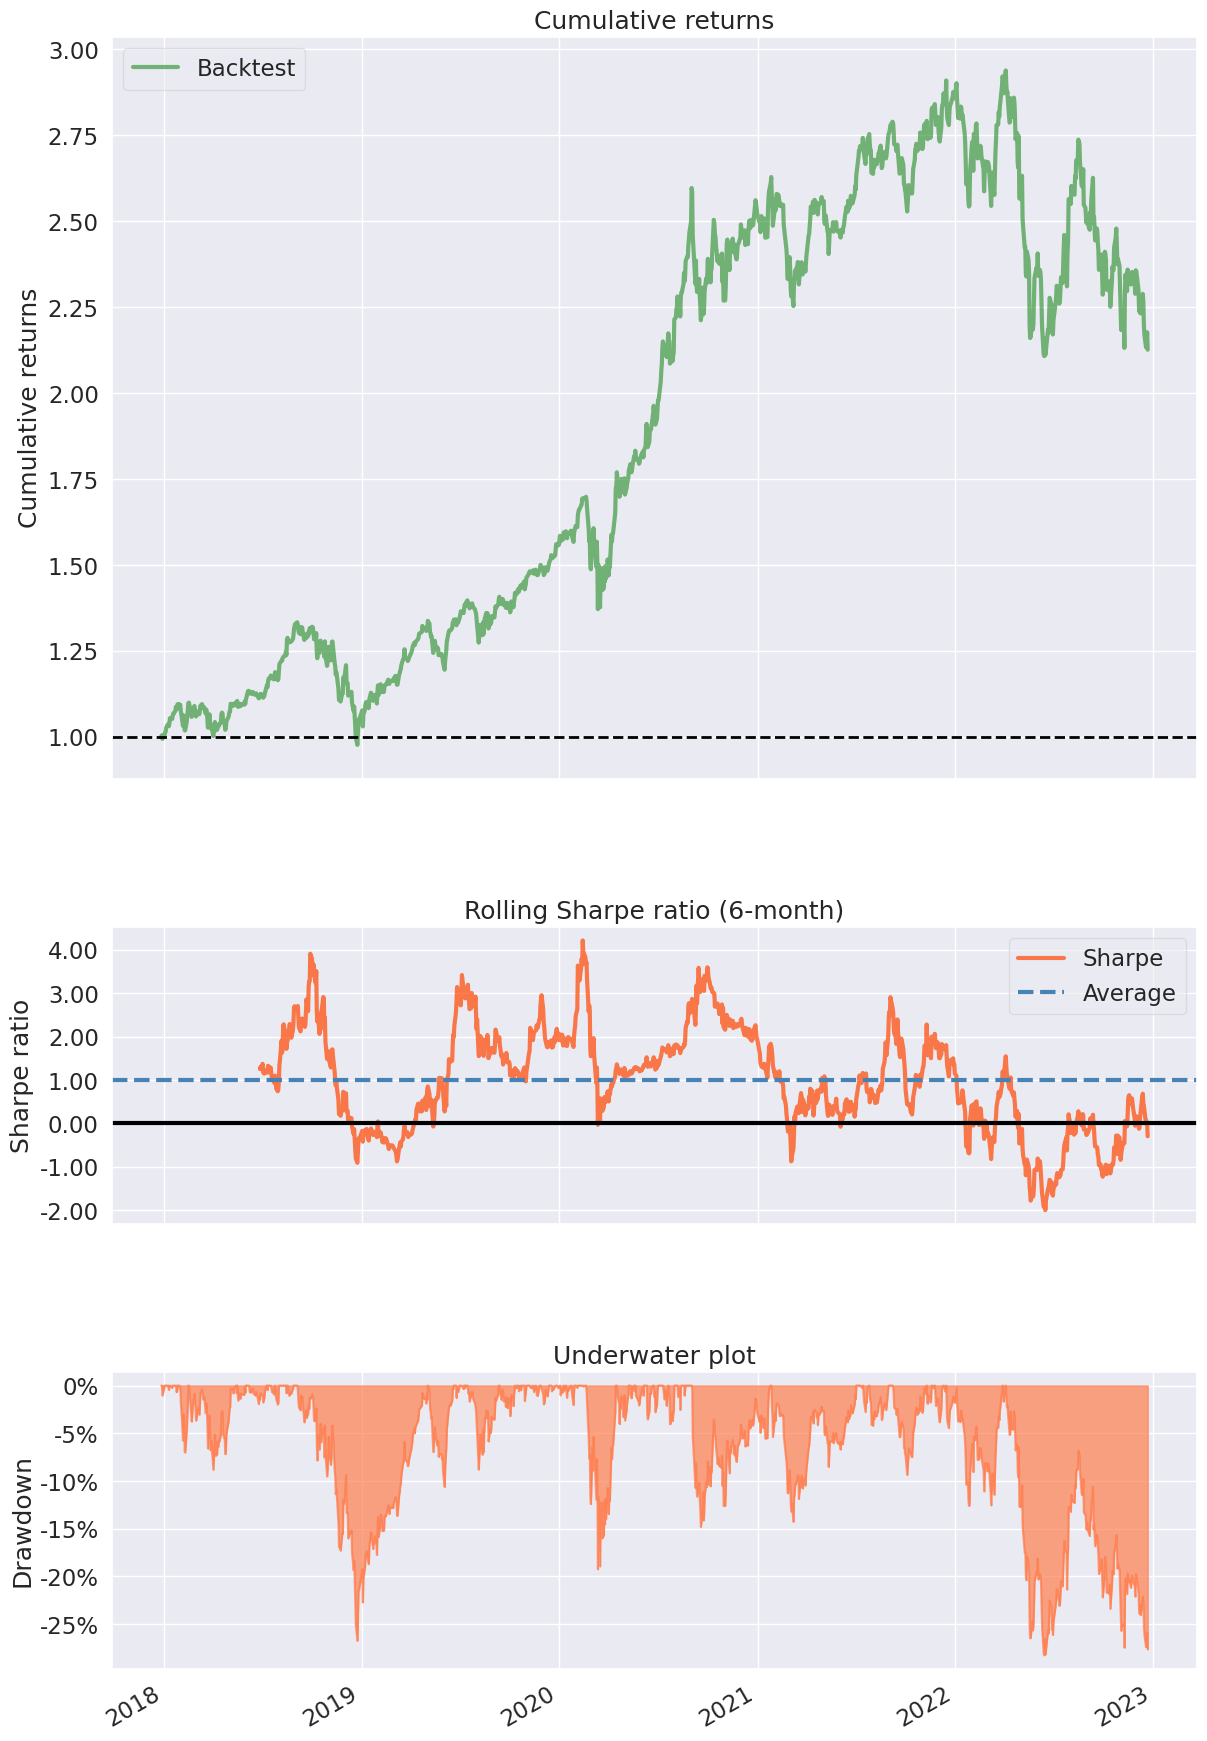

In [74]:
tickers_list = ['AAPL', 'AMZN', 'WMT']

data = pd.DataFrame(columns=tickers_list)

import yfinance as yf
for ticker in tickers_list:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
data = data.pct_change().dropna().mean(axis=1)

import pyfolio as pf

pf.create_simple_tear_sheet(data)